#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/Diwali Sales Data.csv', encoding='unicode_escape');
#to avoid encoding error, use 'unicode_escape'

In [ ]:
dataset.shape

(11251, 15)

In [ ]:
dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#Deleting unrelated columns

In [ ]:
dataset.drop(['Status','unnamed1'],axis=1,inplace=True);

#Data Cleaning
#Checking Null Values

In [ ]:
pd.isnull(dataset)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.isnull(dataset).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#Deleting Null Values

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
pd.isnull(dataset).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#Changing datatype

In [ ]:
dataset['Amount'] = dataset['Amount'].astype('int');

In [ ]:
dataset['Amount'].dtypes

dtype('int64')

In [ ]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#Renaming a column

In [ ]:
dataset.rename(columns = {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [ ]:
dataset.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
dataset[['Age','Orders']].describe()

,Age,Orders
count,11239.000000,11239.000000
mean,35.410357,2.489634
std,12.753866,1.114967
min,12.000000,1.000000
25%,27.000000,2.000000
50%,33.000000,2.000000
75%,43.000000,3.000000
max,92.000000,4.000000


#Exploratory Data Analysis

#Gender

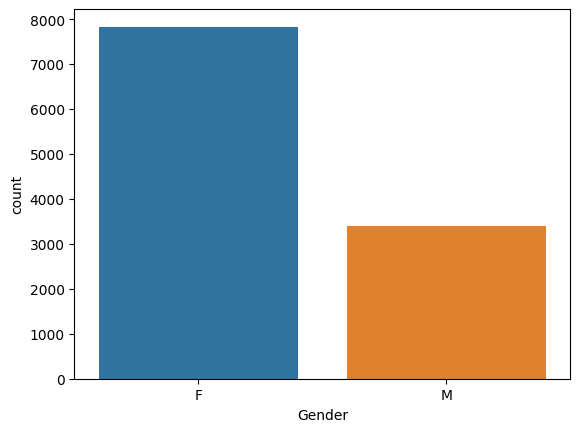

In [ ]:
gender = sb.countplot(x = 'Gender', data=dataset)

#Labeling the columns

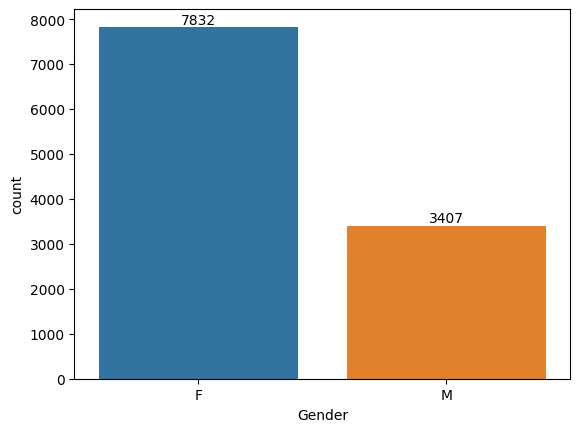

In [ ]:
gender = sb.countplot(x = 'Gender', data=dataset)

for bars in gender.containers:
  gender.bar_label(bars)

#Calculating the total amount based on gender using groupby

In [ ]:
dataset.groupby(['Gender'],as_index=False)

In [ ]:
dataset.groupby(['Gender'],as_index=False)['Amount'].sum()

,Gender,Amount
0,F,74335853
1,M,31913276


In [ ]:
gender_sales =dataset.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

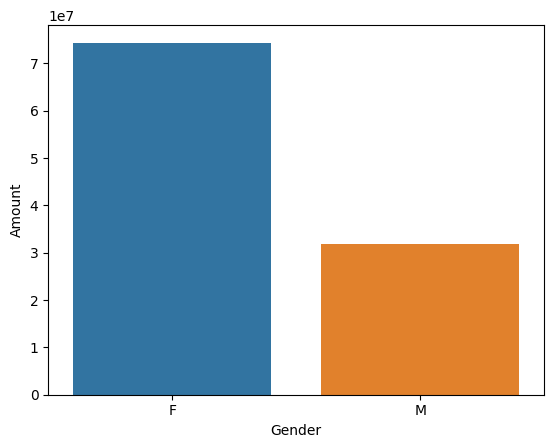

In [ ]:
sb.barplot(x='Gender', y='Amount', data = gender_sales)

From above graphs we can conclude that most of the buyers are females

#Age

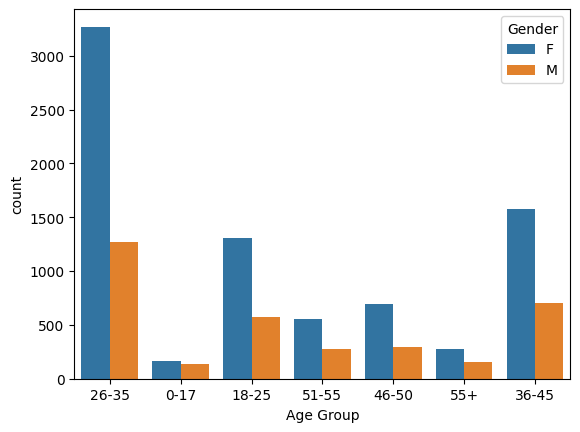

In [ ]:
age = sb.countplot(data = dataset, x='Age Group', hue='Gender')

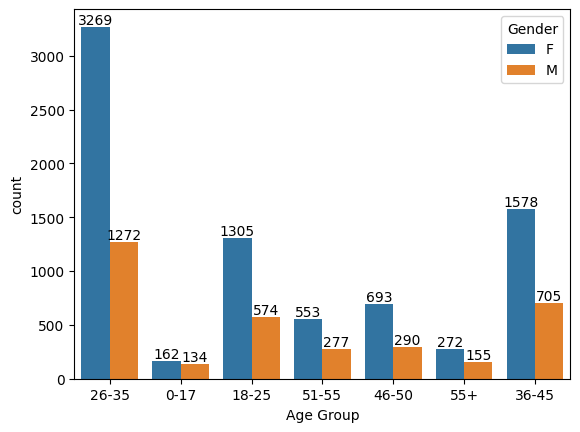

In [ ]:
age = sb.countplot(data = dataset, x='Age Group', hue='Gender')

for bars in age.containers:
  age.bar_label(bars)

#Calculating the total amount based on age using groupby

<Axes: xlabel='Age Group', ylabel='Amount'>

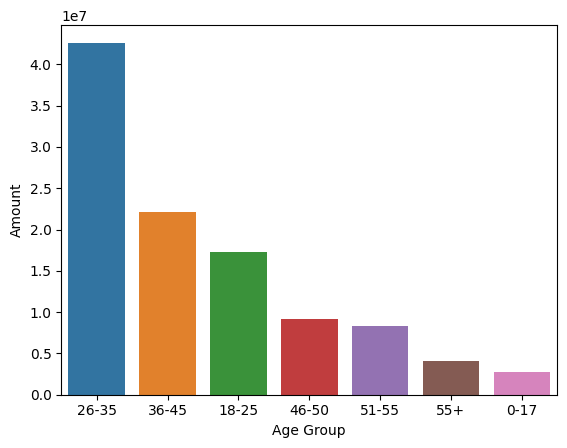

In [ ]:
age_sales  = dataset.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sb.barplot(x='Age Group', y='Amount', data = age_sales)

From above data we can conclude that max. people are of age 26-35 which makes huge sales




#State

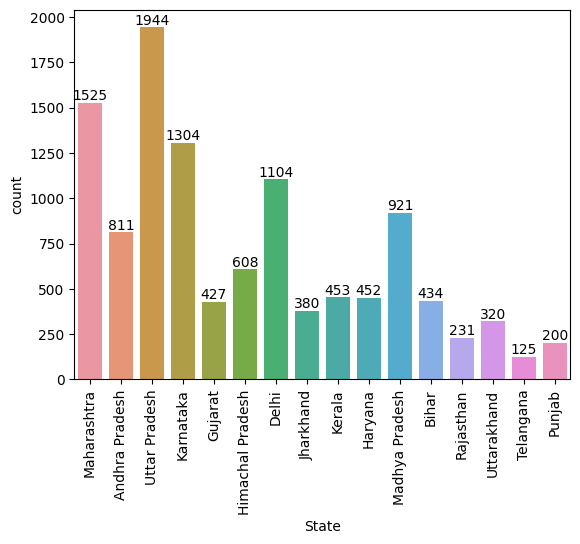

In [ ]:
state = sb.countplot(data = dataset, x='State')
plt.xticks(rotation=90)

for bars in state.containers:
  state.bar_label(bars)

#Total no. of orders from 10 states

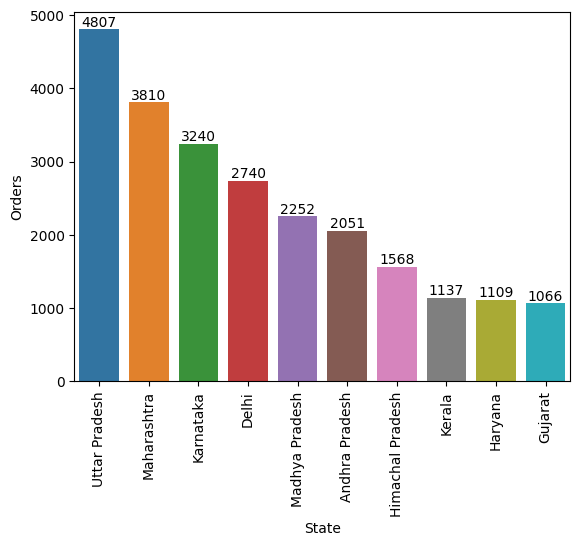

In [ ]:
state_sales = dataset.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
state_sales = sb.barplot(data = state_sales, x='State', y='Orders')
plt.xticks(rotation = 90)

for bars in state_sales.containers:
  state_sales.bar_label(bars)

From the above graph we can observe that most sales are from Uttar Pradesh, Maharashtra, Karnataka

#Marital Status

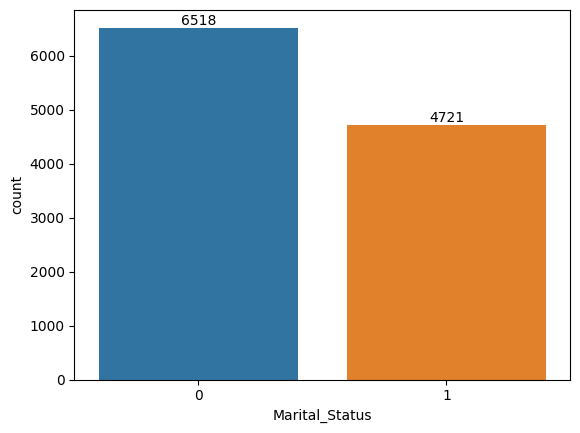

In [ ]:
marital_status = sb.countplot(data = dataset, x='Marital_Status')

for bars in marital_status.containers:
  marital_status.bar_label(bars)

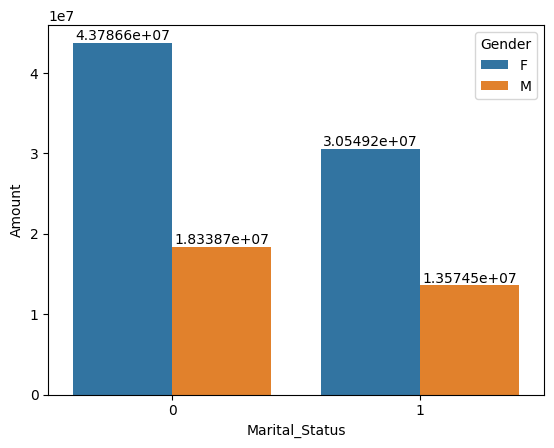

In [ ]:
marital_status_sales = dataset.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

marital_status_sales = sb.barplot(data = marital_status_sales, x='Marital_Status', y='Amount', hue='Gender')

for bars in marital_status_sales.containers:
  marital_status_sales.bar_label(bars)

From above graph we can say that most of the sales are from married women.

#Occupation

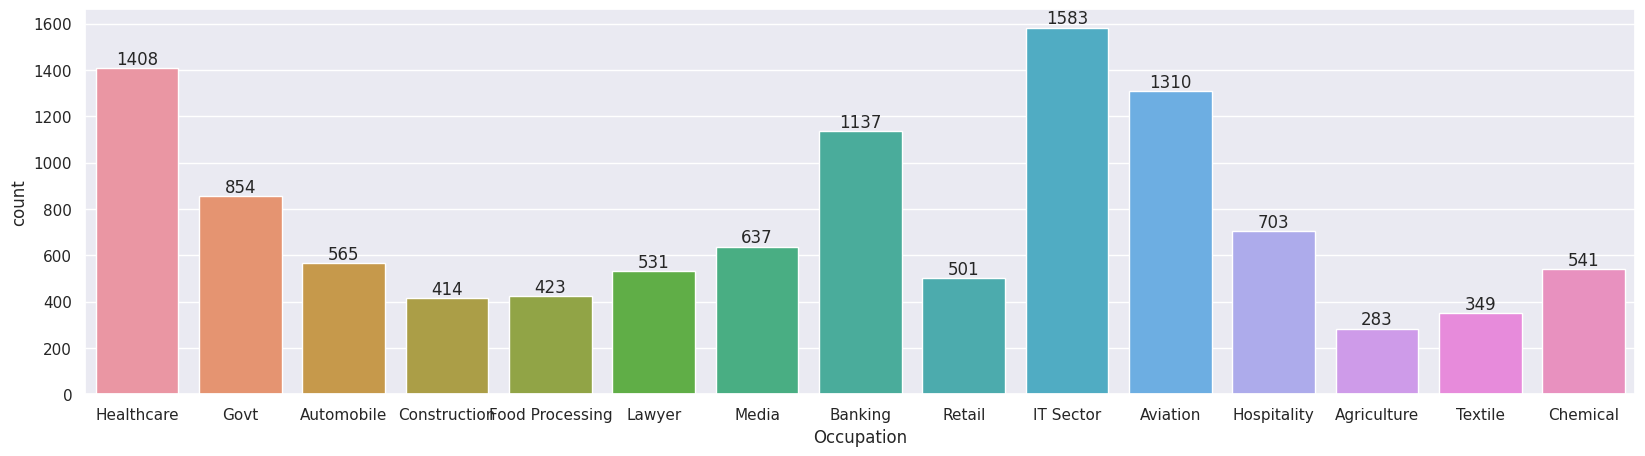

In [ ]:
sb.set(rc = {'figure.figsize': (20,5)})
occupation = sb.countplot(data = dataset, x='Occupation')

for bars in occupation.containers:
  occupation.bar_label(bars)
# plt.xticks(rotation=90)

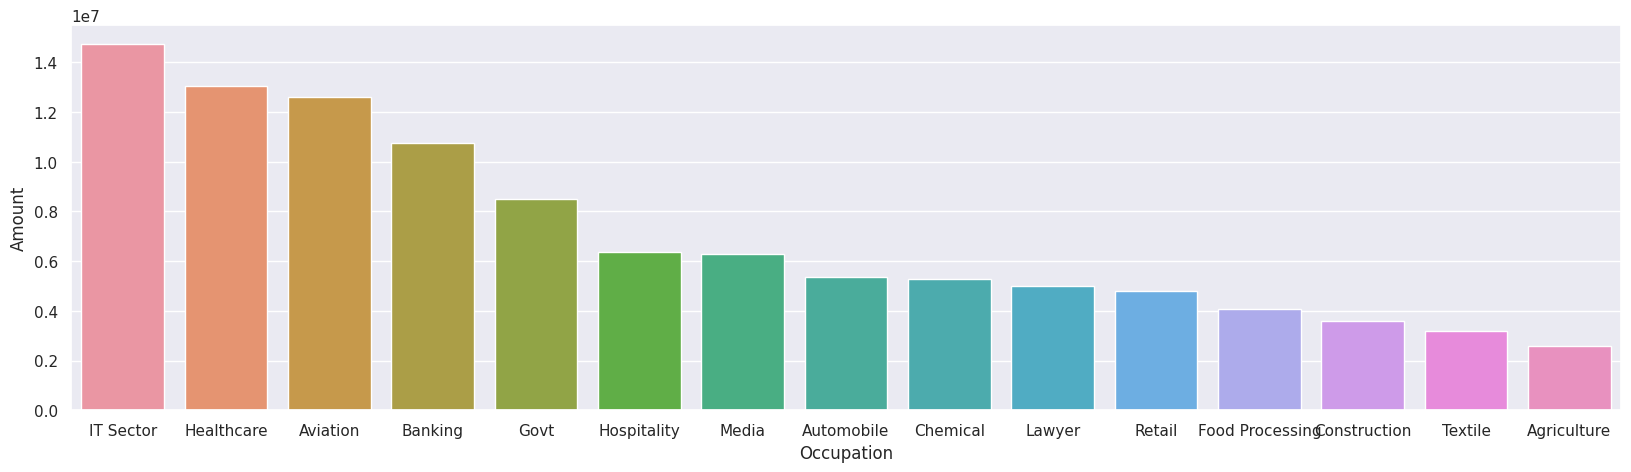

In [ ]:
occupation_sales = dataset.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

occupation_sales = sb.barplot(data = occupation_sales, x='Occupation', y='Amount')

# for bars in occupation_sales.containers:
#   occupation_sales.bar_label(bars)

From above graph most sales are from IT Sector, Health Care, Aviation

#Product Category

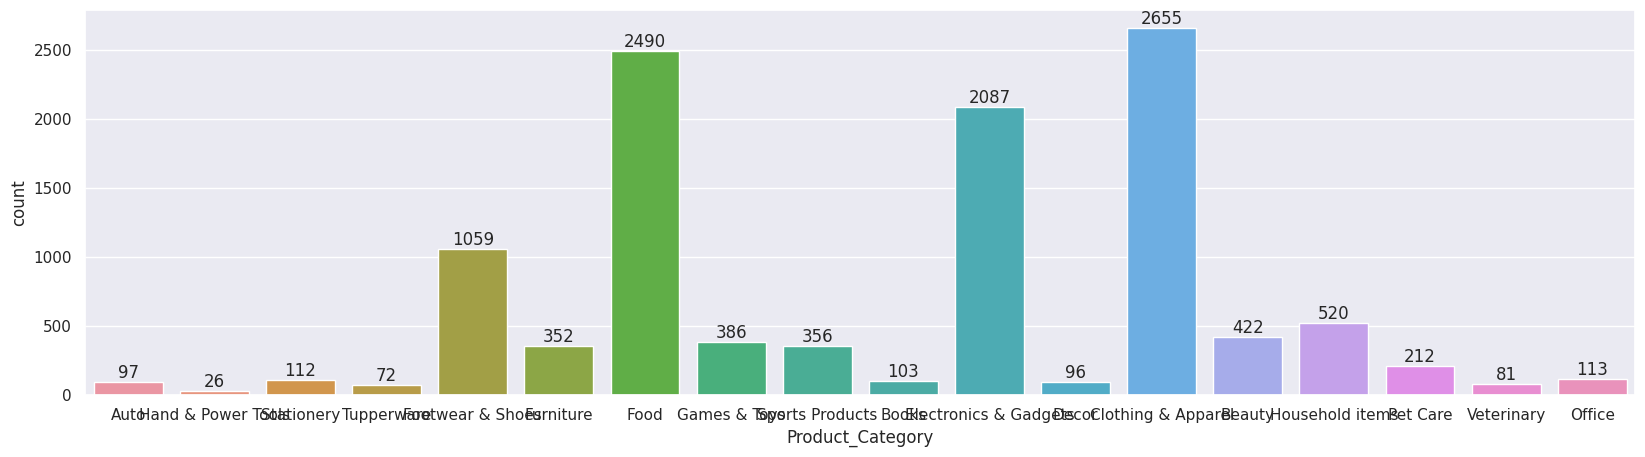

In [ ]:
sb.set(rc = {'figure.figsize': (20,5)})
products = sb.countplot(data = dataset, x='Product_Category')

for bars in products.containers:
  products.bar_label(bars)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

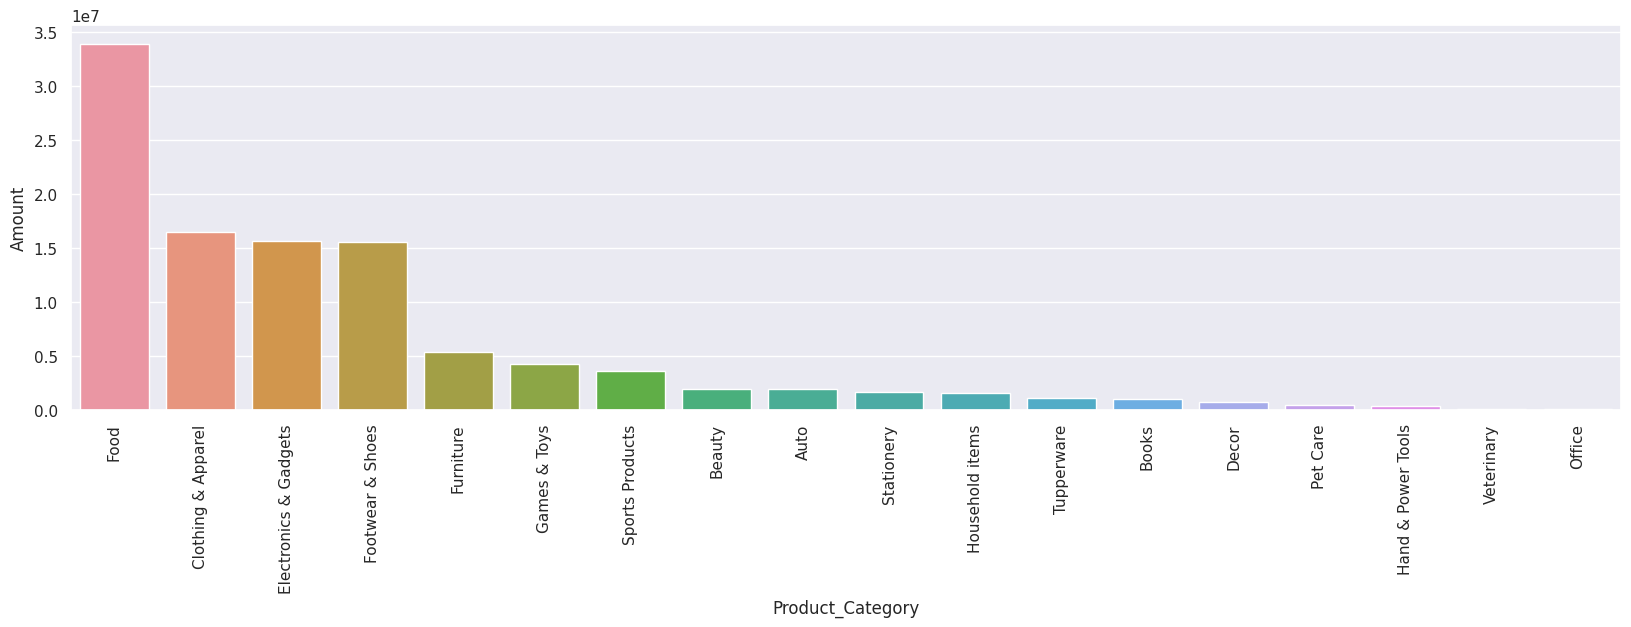

In [ ]:
products_sales = dataset.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

products_sales = sb.barplot(data = products_sales, x='Product_Category', y='Amount')

plt.xticks(rotation = 90)

From above graph we can conclude that most of products are from Food, Clothing & Electronics

#Top 10 Products based on Product ID's

<Axes: xlabel='Product_ID', ylabel='Orders'>

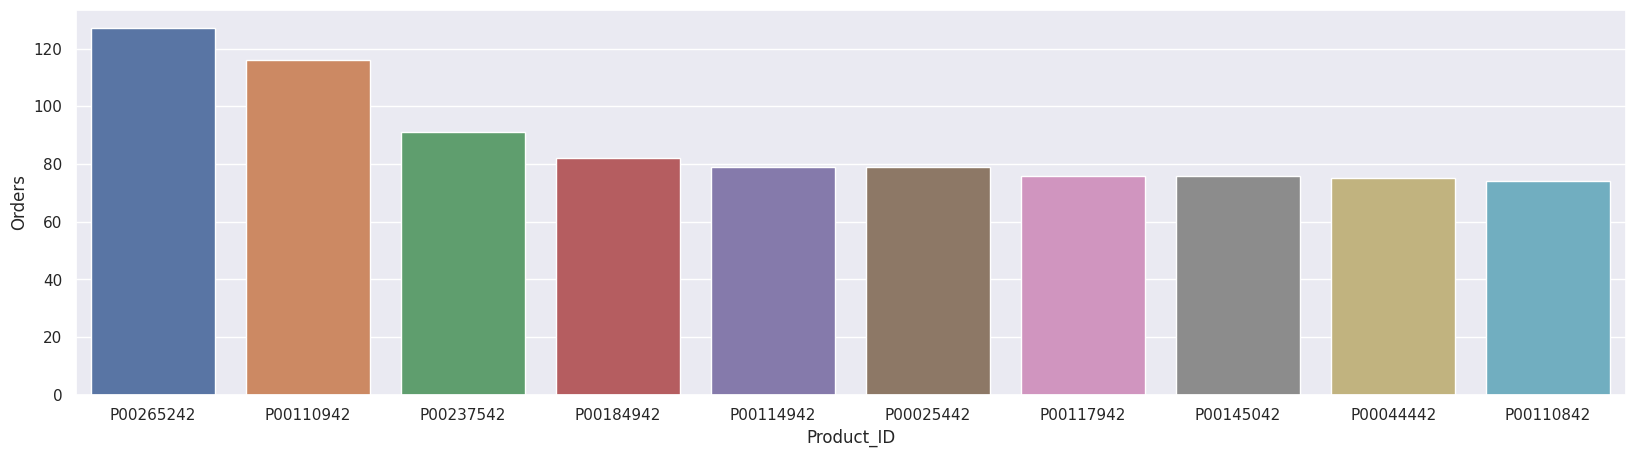

In [ ]:
product_id = dataset.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sb.barplot(data = product_id, x='Product_ID', y='Orders')

#Conclusion

Based on the analysis we can conclude that most of the sales are done by Married women of age group 26-35 from UP, Maharastra and Karnataka working in IT Sector, Healthcare and Aviation and more likely to buy products from Food, Clothing & Electronics category